# Conociendo los Datos
**Cursos de Udemy:** 
   * Python desde cero hasta analísis estadísticos con Pandas y Numpy.
   * Toma de decisión usando la tecnología disponible.

**Objectivos:**
  * Aprender a relacionarse con los datos, usando las estadísticas
  * Uso de `pandas.read_csv` 
  * Uso de `matplotlib.pyplot`
  

In [1]:
#importar librerias
from __future__ import print_function
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


#cargar la data 
data_path = ['/home/ponisio7/Dropbox/Christian/Data']
filepath = os.sep.join(data_path + ['abalone.csv'])
data = pd.read_csv(filepath)

**Observar los primeros 5 datos y cantidad de datos:**
  * Aprender a relacionarse con los datos, usando las estadísticas
  * Los primeros 5 datos `data.head()` 
  * Observar cantidad de (filas, columnas) = (instancias, atributos) `data.shape`

In [2]:
print(data.shape)
data.head()

(4177, 9)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**Observar el resumen estadístico de los valores numéricos:**
  * Aprender a relacionarse con los datos, usando las estadísticas
  * Use `data.describe()` 

In [8]:
#Estadisticas por grupo
print(data.groupby('Sex').describe().T)
datos=data.groupby('Sex').describe().T
datos.to_csv('estadisticasporgrupo.csv',index=True)
#en dado caso que no nos interese por grupo
#data.describe()

Sex                            F            I            M
Length        count  1307.000000  1342.000000  1528.000000
              mean      0.579093     0.427746     0.561391
              std       0.086160     0.108858     0.102697
              min       0.275000     0.075000     0.155000
              25%       0.525000     0.360000     0.505000
              50%       0.590000     0.435000     0.580000
              75%       0.640000     0.510000     0.630000
              max       0.815000     0.725000     0.780000
Diameter      count  1307.000000  1342.000000  1528.000000
              mean      0.454732     0.326494     0.439287
              std       0.070954     0.088109     0.084398
              min       0.195000     0.055000     0.110000
              25%       0.410000     0.270000     0.395000
              50%       0.465000     0.335000     0.455000
              75%       0.505000     0.390000     0.500000
              max       0.650000     0.550000     0.6300

In [9]:
#Estadisticas
data.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


**Observar los diagramas:**
  * Aprender a relacionarse con los datos, usando las estadísticas
  * Diagrama de caja y bigote para el atributo Length `data.Length.plot.box()` 
  * Histograma para el atributo Length `plt.hist(data.Length, bins=7)`
  
  Para cambiar a otro atributo numérico solo debe cambiar el nombre ejemplo: `data.Diameter.plot.box()` o `plt.hist(data.Diameter, bins=7)`

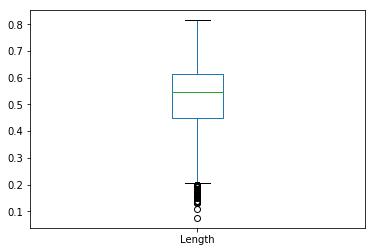

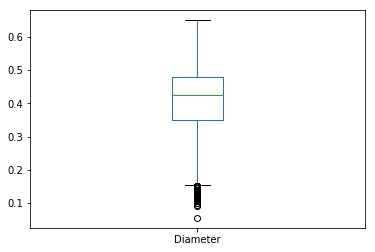

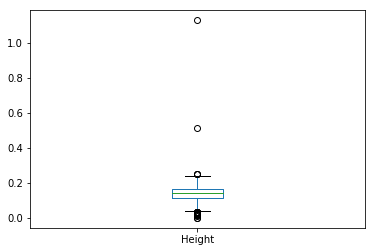

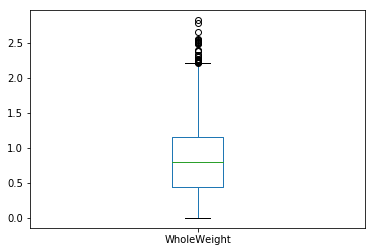

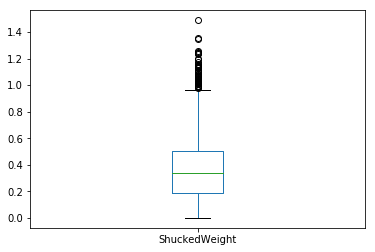

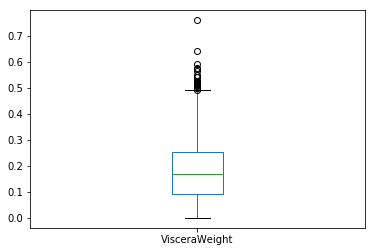

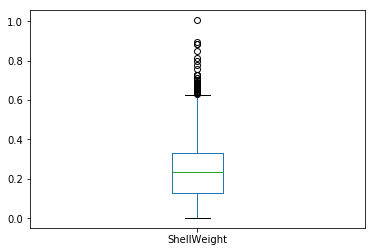

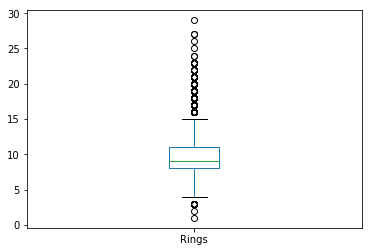

In [3]:
#diagrama de caja y bigote”
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
columna=list(data.columns.values)

for i in columna: #pasar por cada columna
    if(np.issubdtype(data[i].dtype, np.number)): #solo los que son numéricos
        data[i].plot.box()
        plt.show()


In [19]:
#Eliminar datos atípicos en la dataframe si y solo si hay desconfianza de los datos.
columna=list(data.columns.values)
for i in range(len(columna)): #pasar por cada columna
    if(np.issubdtype(data[columna[i]].dtype, np.number)): #solo los que son numéricos
        q1 = data[columna[i]].quantile(0.25)
        q3 = data[columna[i]].quantile(0.75) 
        iqr=q3-q1
        data = data[np.array(data[columna[i]])>(q1-1.5*iqr)]
        data = data[np.array(data[columna[i]])<(q3+1.5*iqr)]
#para analizar los datos diferentes como hombre - mujer se puede crear sub dataframe para cada genero y 
#luego unirlas nuevamente

In [4]:
data_female=data[(data['Sex']=='F')]#datos femeninos
columna=list(data_female.columns.values)
for i in range(len(columna)): #pasar por cada columna
    if(np.issubdtype(data_female[columna[i]].dtype, np.number)): #solo los que son numéricos
        q1 = data_female[columna[i]].quantile(0.25)
        q3 = data_female[columna[i]].quantile(0.75) 
        iqr=q3-q1
        data_female = data_female[np.array(data_female[columna[i]])>(q1-1.5*iqr)]
        data_female = data_female[np.array(data_female[columna[i]])<(q3+1.5*iqr)]
        
data_male=data[(data['Sex']=='M')]#datos masculinos
columna=list(data_male.columns.values)
for i in range(len(columna)): #pasar por cada columna
    if(np.issubdtype(data_male[columna[i]].dtype, np.number)): #solo los que son numéricos
        q1 = data_male[columna[i]].quantile(0.25)
        q3 = data_male[columna[i]].quantile(0.75) 
        iqr=q3-q1
        data_male = data_male[np.array(data_male[columna[i]])>(q1-1.5*iqr)]
        data_male = data_male[np.array(data_male[columna[i]])<(q3+1.5*iqr)]

data_inter=data[(data['Sex']=='I')]#datos masculinos
columna=list(data_male.columns.values)
for i in range(len(columna)): #pasar por cada columna
    if(np.issubdtype(data_inter[columna[i]].dtype, np.number)): #solo los que son numéricos
        q1 = data_inter[columna[i]].quantile(0.25)
        q3 = data_inter[columna[i]].quantile(0.75) 
        iqr=q3-q1
        data_inter = data_inter[np.array(data_inter[columna[i]])>(q1-1.5*iqr)]
        data_male = data_inter[np.array(data_inter[columna[i]])<(q3+1.5*iqr)]
        
data = pd.concat([data_female, data_male,data_inter])
data

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
10,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,14
13,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.2050,10
14,F,0.470,0.355,0.100,0.4755,0.1675,0.0805,0.1850,10
17,F,0.440,0.340,0.100,0.4510,0.1880,0.0870,0.1300,10
22,F,0.565,0.440,0.155,0.9395,0.4275,0.2140,0.2700,12
23,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.2000,9
24,F,0.615,0.480,0.165,1.1615,0.5130,0.3010,0.3050,10
25,F,0.560,0.440,0.140,0.9285,0.3825,0.1880,0.3000,11


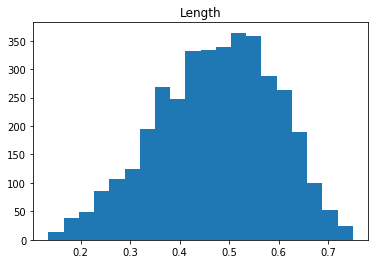

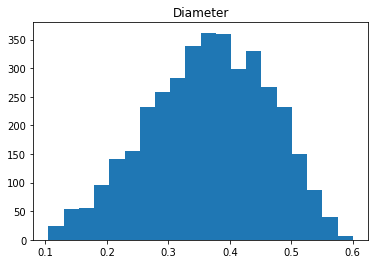

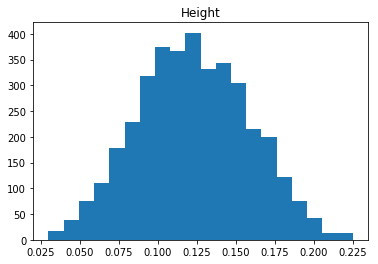

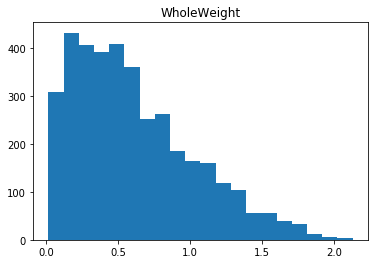

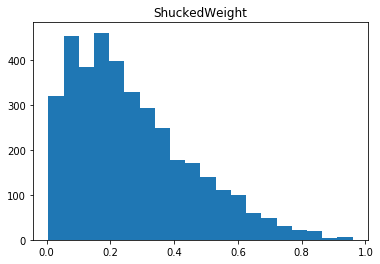

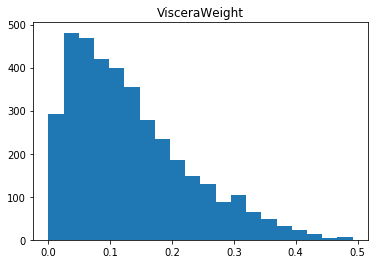

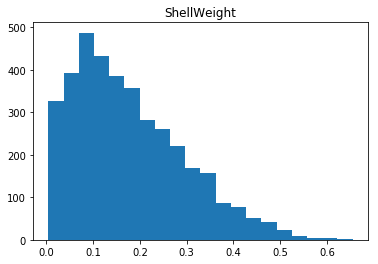

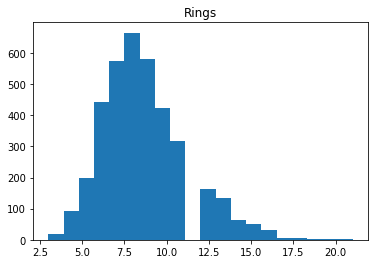

In [5]:
#imprimir un histograma o grafico de barras con n barras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
columna=list(data.columns.values)
n=20
for i in columna: #pasar por cada columna
    if(np.issubdtype(data[i].dtype, np.number)): #solo los que son numéricos
        plt.hist(data[i], bins=n)
        plt.title(i)
        plt.show()


In [6]:
data.to_csv('eliminadosDatosAtipicosPorGenero.csv',index=False)




# Conociendo los Datos

**Tarea:**
  * Aprender a relacionarse con los datos, usando las estadísticas
  * Cargue cada data de las proporcionadas para este curso y haga lo siguiente:
  * Revise los primeros 5 datos  `data.head()` si desea revisarlos completo solo ejecute `data`
  * Observe el resumen estadístico `data.describe()`
  * Haga diagramas de caja y bigote para todos los atributos `data.xxxx.plot.box()` siendo `xxxx` cada atributo
  * Histograma para todos los atributos `plt.hist(data.xxxx, bins=7)`